# <center> NIRS <center> EXTERNAL VALIDATION OF GROSS PROTEIN CONTENT IN THE DIET
***
# Table of Contents
* [READING THE DATASET INTO PYTHON](#READING-THE-DATASET-INTO-PYTHON)
* [DATA EDITING](#DATA-EDITING)
    * [Creating dummy variables (One-Hot Encode)](#Creating-dummy-variables-(One-Hot-Encode))
    * [Creating training and testing datasets](#Creating-training-and-testing-datasets)
***

## IMPORTS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
#warnings.filterwarnings('ignore')
# Private libary
import cmls

## FUNCTIONS

## READING THE DATASET INTO PYTHON

In [2]:
df0 = pd.read_excel('Datasets/Lucas/dados_nirs_lucas.xlsx')
df = df0

In [3]:
df_larrisa = pd.read_excel('Datasets/Lucas/dados_larrisa_PB_validacao_externa.xlsx')

In [4]:
#Reset
df = df0

# Transform all feautere names to string
df.columns = df.columns.map(str)

## DATA DIVISION

In [5]:
# Remove data with TD PB larger than 16
df = df[df['TD PB'] < 16]

In [15]:
# Select all NIRS data as x
x = df.loc[:,'12493.238':'4007.556']

In [16]:
with open('nirs_pre_processed_best_R2.npy', 'rb') as f:
    x = np.load(f)

In [8]:
# "savitzky_golay{'deriv': 1, 'order': 1, 'window_size': 17} / MSC{}" 'nirs_pre_processed_best_R2.npy'
# "EMSC{} / savitzky_golay{'deriv': 1, 'order': 1, 'window_size': 15}" nirs_pre_processed_best_RMSECV

In [9]:
x_train = pd.DataFrame(x)

In [17]:
cols = df.loc[:,'12493.238':'4007.556']

x_train.columns = cols.columns
del cols

In [11]:
# Response variable vector
y_train = df['TD PB']

In [12]:
y = df_larrisa['TD PB']

In [13]:
x = df_larrisa.loc[:,'12493.238':'4007.556']

In [64]:
y = pd.concat([y_train, y_test ], ignore_index=True)

In [65]:
x = pd.concat([x_train, x_test], ignore_index=True)

In [14]:
# Split the data set into training (70%) and testing (30%)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, shuffle=True, random_state=40)
print("N. samples training %s , N. samples testing %s" % (x_train.shape[0], x_test.shape[0]))

N. samples training 64 , N. samples testing 28


## PRE-PROCESSING

### Feature Scaling

In [106]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

### Summary Statistics

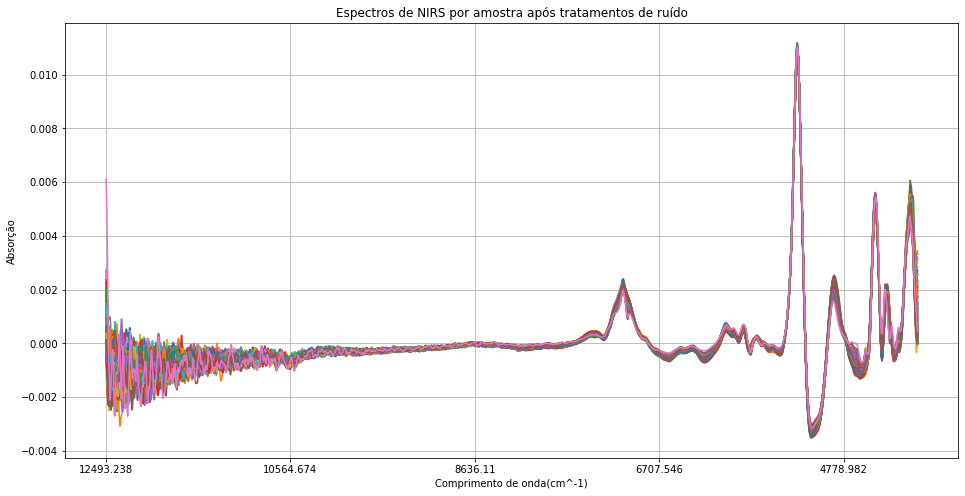

In [72]:
for i in range(0, df.shape[0]):
    x.loc[i, '12493.238':'4007.556'].plot(kind='line', figsize=(16,8))


plt.ylabel("Absorção")
plt.xlabel("Comprimento de onda(cm^-1)")
plt.grid(visible=True)
plt.title("Espectros de NIRS por amostra após tratamentos de ruído")
plt.show()

In [ ]:
df.describe()

,Peso corporal kg,Consumo MS kg/dia,Consumo MO kg/dia,Consumo PB kg/dia,Consumo FDN kg/dia,Consumo EE kg/dia,Consumo CNF kg/dia,Fezes MS kg/dia,Fezes MO kg/dia,Fezes PB kg/dia,...,3633.415,3629.557,3625.7,3621.843,3617.986,3614.129,3610.272,3606.415,3602.558,3598.7
count,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,...,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000
mean,509.824906,6.379836,6.030204,0.619715,3.469328,0.192359,1.711190,2.704554,2.330777,0.263546,...,0.229030,0.213754,0.260170,0.291170,0.286859,0.283470,0.269462,0.242059,0.239917,0.225538
std,102.339137,2.002452,1.875748,0.336699,1.073802,0.080614,0.641736,0.795194,0.720937,0.096765,...,0.199782,0.237003,0.188358,0.156556,0.175760,0.191097,0.185356,0.187441,0.166877,0.164253
min,281.000000,1.429860,1.435228,0.092339,0.577233,0.051604,0.441309,0.760456,0.622813,0.054601,...,-0.276049,-0.395581,-0.238561,-0.024993,-0.125093,-0.180869,-0.196580,-0.261695,-0.144254,-0.129140
25%,425.500000,4.945368,4.651638,0.351819,2.707140,0.134618,1.212661,2.130980,1.851124,0.192972,...,0.107274,0.069525,0.139561,0.179395,0.165436,0.147912,0.157507,0.108506,0.116012,0.106476
50%,530.000000,6.231714,5.898576,0.568794,3.385846,0.182511,1.674349,2.681238,2.313793,0.255564,...,0.229640,0.233216,0.255576,0.287353,0.282204,0.287219,0.283499,0.255783,0.239895,0.216038
75%,582.000000,7.716805,7.304223,0.795090,4.207334,0.232064,2.106837,3.202887,2.748287,0.316227,...,0.350355,0.366050,0.391686,0.387802,0.396442,0.404799,0.388062,0.374971,0.352256,0.347993
max,744.500000,12.277564,11.729826,1.780895,6.722461,0.483549,3.866051,5.143320,4.547951,0.570620,...,0.940678,1.049306,0.902545,0.783421,0.916157,0.859193,0.886101,0.702963,0.752801,0.859664


/home/caio/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/caio/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


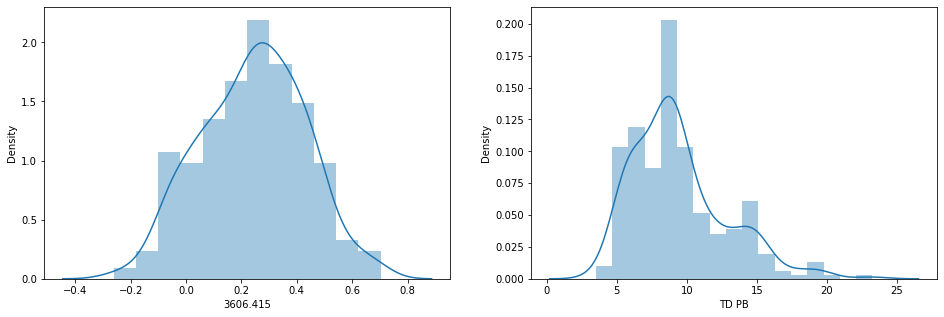

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['3606.415'])
plt.subplot(1,2,2)
sns.distplot(df['TD PB'])
plt.show()

### Noise Treatment

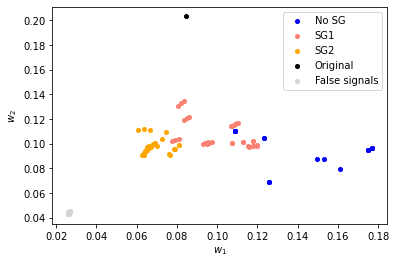

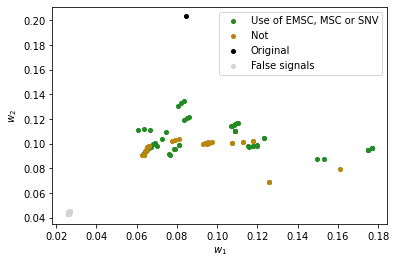

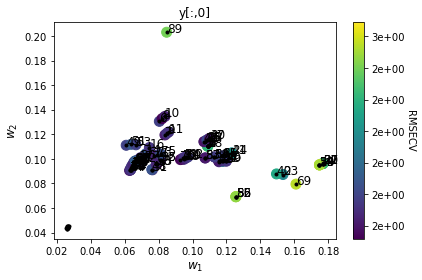

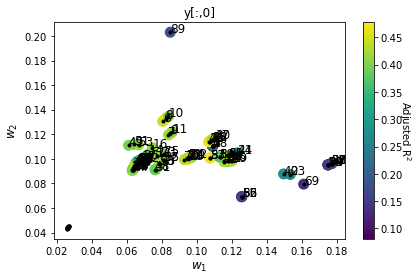

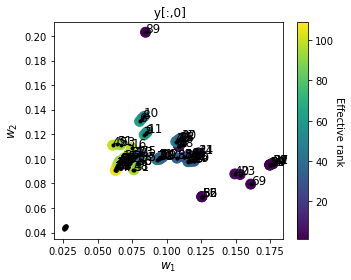

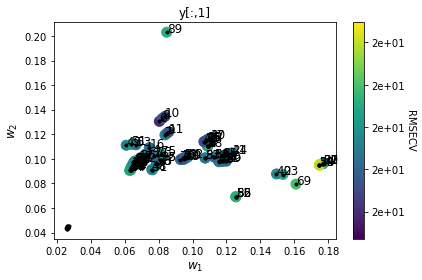

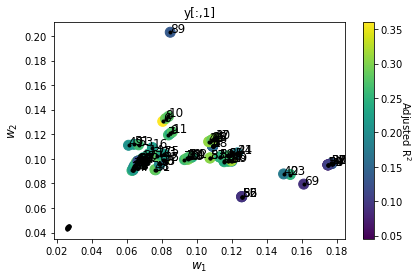

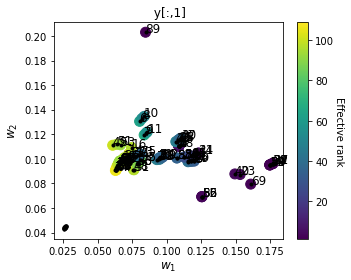

In [70]:
import NIR_preprocess as nir_pre
y = df[['TD PB', 'CD PB']]
combination, datasets, datasets0, R2_all, R2adj_all, RMSECV_all, VIP_all, Ef_all, Wt = nir_pre.compare_preprocessing(x.values, y.values)

In [136]:
x = datasets0[8]

In [137]:
combination[8]

"EMSC{} / savitzky_golay{'deriv': 1, 'order': 1, 'window_size': 15}"

In [120]:
RMSECV_all[0].argmin()

8

In [121]:
R2adj_all[0].argmax()

30

### Outliers Treatment

In [ ]:
from scipy import stats
td_pb_zscores_descending_index = stats.zscore(df['TD PB']).sort_values(ascending=False).index.to_list()

In [ ]:
d = {'TD PB' : df['TD PB'].values, 'Z SCORE': stats.zscore(df['TD PB'])}

In [ ]:
pd.DataFrame(d).sort_values('Z SCORE', ascending=False).head()

In [ ]:
"""# Remove NIRS data with Z SCORE higher than 3
df = df[(np.abs(stats.zscore(df.loc[:,'12493.238':])) < 3).all(axis=1)]
df.shape"""

### Feature Selecting

In [68]:
# evaluation of a model using 88 features chosen with mutual information
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

k_vs_score = []
for k in range(1,2200,100):
    # configure to select a subset of features
    fs = SelectKBest(score_func=mutual_info_regression, k=k)
    # learn relationship from training data
    fs.fit(x_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(x_train)
    # transform test input data
    X_test_fs = fs.transform(x_test)

    model = KNeighborsRegressor()
    model.fit(X_train_fs, y_train)
    # evaluate the model
    yhat = model.predict(X_test_fs)
    # evaluate predictions
    mae = mean_absolute_error(y_test, yhat)
    # print("k = {} - R2 = {}".format(k, score))

    k_vs_score.append(mae)

<AxesSubplot:>

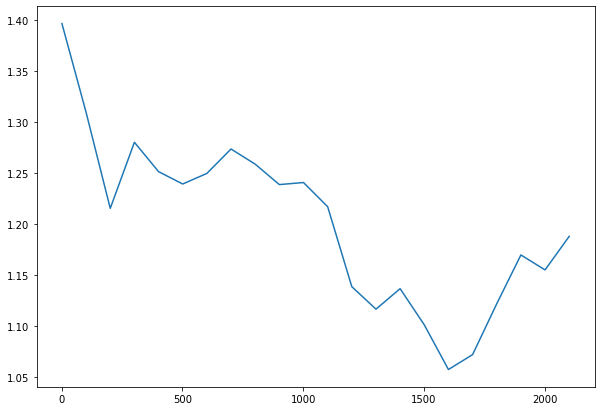

In [69]:
pd.Series(k_vs_score, index=range(1,2200,100)).plot(figsize=(10,7))

In [147]:
scores = np.array(k_vs_score)

In [152]:
scores.size

22

In [160]:
selector = SelectKBest(score_func=mutual_info_regression, k=10)
selector.fit(x_train, y_train)

SelectKBest(score_func=<function mutual_info_regression at 0x7fb460112ca0>)

In [161]:
mask = selector.get_support()
x_test = pd.DataFrame(x_test)
x_train = pd.DataFrame(x_train)
x_test.columns = x.columns
x_train.columns = x.columns
x_test.columns[mask]

Index(['5696.978', '5068.266', '5060.552', '5041.266', '5037.409', '5033.552',
       '5029.695', '5025.838', '5018.124', '5002.695'],
      dtype='object')

<AxesSubplot:>

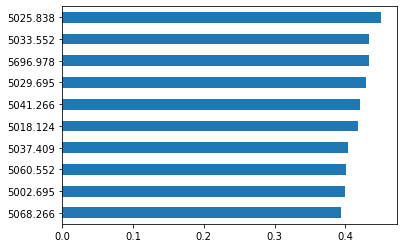

In [162]:
pd.Series(selector.scores_[mask], index=x_train.columns[mask]).sort_values().plot.barh()

In [70]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

# configure to select a subset of features
fs = SelectKBest(score_func=mutual_info_regression, k=1600)
# learn relationship from training data
fs.fit(x_train, y_train)
# transform train input data
x_train = fs.transform(x_train)
x_test = fs.transform(x_test)

## MODEL SELECTION

### Hold Out

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression


pcr = make_pipeline( PCA(n_components=15), LinearRegression())
pcr.fit(x_train, y_train)
pca = pcr.named_steps["pca"] 
print(pca.explained_variance_ratio_)

pls = PLSRegression(n_components=10)
pls.fit(x_train, y_train)


preds = pcr.predict(x_test)
cmls.evalute_model(y_test, preds)

[0.59815159 0.12833415 0.04658617 0.02198822 0.02013022 0.01510931
 0.01289268 0.00755422 0.00706386 0.00648395 0.00575242 0.00460582
 0.00451384 0.00393688 0.00369393]


,R2,MAE,RMSE,RPD
Teste,0.604978,1.546861,1.896119,1.598701


In [107]:
from sklearn.svm import SVR
svr_model = SVR()
preds = svr_model.fit(x_train, y_train).predict(x_test)
cmls.evalute_model(y_test, preds)

,R2,MAE,RMSE,RPD
Teste,0.71859,0.796726,0.968133,1.919674


In [108]:
from sklearn.neighbors import KNeighborsRegressor
knnr_model = KNeighborsRegressor(n_neighbors=3, n_jobs=-1, weights='distance', p=1)
knnr_model = make_pipeline( PCA(n_components=70, random_state=0), knnr_model)

preds = knnr_model.fit(x_train, y_train).predict(x_test)
cmls.evalute_model(y_test, preds)

ValueError: n_components=70 must be between 0 and min(n_samples, n_features)=64 with svd_solver='full'

In [109]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_model = GradientBoostingRegressor(random_state=1, max_depth=4)
preds = gbr_model.fit(x_train, y_train).predict(x_test)
train_preds = gbr_model.predict(x_train)
cmls.evalute_model(y_test, preds, y_train, train_preds)

,R2,MAE,RMSE
Teste,0.77346,0.697530,0.868635
Treino,1.00000,0.000068,0.000084


In [110]:
from sklearn import linear_model
reg = linear_model.BayesianRidge()
reg.fit(x_train, y_train)
preds = reg.predict(x_test)
cmls.evalute_model(y_test, preds)

,R2,MAE,RMSE,RPD
Teste,0.71708,0.765276,0.970726,1.914545


In [111]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=20, criterion='poisson', random_state=0, n_jobs=-1)

preds = rf.fit(x_train,y_train).predict(x_test)
cmls.evalute_model(y_test, preds)

,R2,MAE,RMSE,RPD
Teste,0.786113,0.655304,0.84403,2.201935


In [112]:
from xgboost import XGBRegressor
xgb = XGBRegressor(max_depth=4, random_state=0)
preds = xgb.fit(x_train, y_train).predict(x_test)
cmls.evalute_model(y_test, preds)

,R2,MAE,RMSE,RPD
Teste,0.745844,0.804362,0.920059,2.019978


In [113]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(random_state=0, max_iter=500, hidden_layer_sizes=(50, 50, 50))
preds = mlp.fit(x_train, y_train).predict(x_test)
cmls.evalute_model(y_test, preds)

,R2,MAE,RMSE,RPD
Teste,0.71114,0.788719,0.980864,1.894757


In [114]:
from sklearn.ensemble import BaggingRegressor

rse = BaggingRegressor(bootstrap=False, base_estimator=KNeighborsRegressor(n_neighbors=3), max_features=128, n_jobs=-1, n_estimators=4, random_state=0)
preds = rse.fit(x_train, y_train).predict(x_test)
cmls.evalute_model(y_test, preds)

,R2,MAE,RMSE,RPD
Teste,0.82703,0.630565,0.759015,2.448568


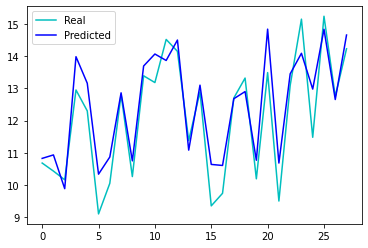

In [115]:
cmls.plot_real_vs_predict(y_test, preds)

## Few Features Test

In [102]:
corrs_td_pb = df.corr(method='pearson').loc[:, 'TD PB'].sort_values(ascending=False)

In [103]:
corrs_td_pb[:20]

TD PB                1.000000
Consumo PB kg/dia    0.809197
CD PB                0.753460
3745.271             0.392619
Consumo MS kg/dia    0.373019
Consumo MO kg/dia    0.356430
CD MS                0.338232
3741.414             0.332617
Consumo EE kg/dia    0.315860
3629.557             0.315445
CD MO                0.314014
5091.409             0.310276
5095.266             0.310225
5087.552             0.310009
5075.98              0.309885
5072.123             0.309837
5079.838             0.309829
5083.695             0.309814
5068.266             0.309725
5099.123             0.309700
Name: TD PB, dtype: float64

In [111]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.metrics import r2_score

k_vs_score = []

for k in range(3,1000,1):
    selector = SelectKBest(score_func=f_regression, k=k)

    X_train2 = selector.fit_transform(x_train, y_train)
    X_test2 = selector.transform(x_test)


    svr_model = SVR()
    svr_model.fit(X_train2, y_train)

    preds = svr_model.predict(X_test2)

    score = r2_score(y_test, preds)
    # print("k = {} - R2 = {}".format(k, score))

    k_vs_score.append(score)

<AxesSubplot:>

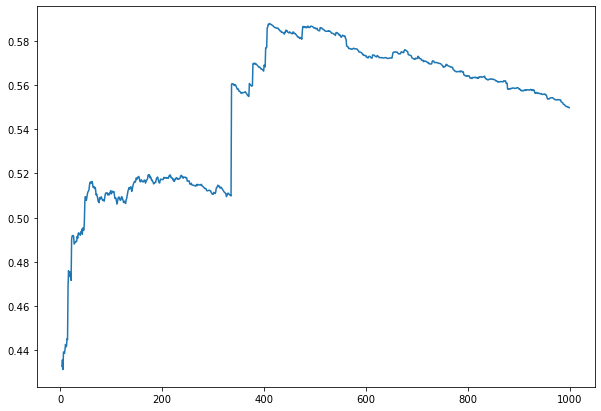

In [112]:
pd.Series(k_vs_score, index=range(3,1000,1)).plot(figsize=(10,7))

In [106]:
selector = SelectKBest(score_func=f_regression, k=10)
selector.fit(x_train, y_train)

SelectKBest(score_func=<function f_regression at 0x7fb4602c9dc0>)

In [107]:
mask = selector.get_support()
x_test.columns[mask]
# Features mais relevantes

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
pd.Series(selector.scores_[mask], index=x_train.columns[mask]).sort_values().plot.barh()

In [ ]:
# Non NIRS features
print(df.loc[:,:'CD CNF'].columns.tolist())

In [ ]:
# Select all NIRS data as x
x = df.loc[:,'12493.238':]

# Add Categoria feature
x = x.join(df.loc[:,['Status fisiologico', 'Categoria']])
x = pd.get_dummies(x, drop_first=False)

In [ ]:
predictive_features = ['12462.381', '12458.523', '12454.666', '12450.809', '3745.271',
       '3741.414', '3706.7', '3629.557', 'Status fisiologico_Lactante']

x = x[predictive_features]

# One-Hot Encode categorical features
x = pd.get_dummies(x, drop_first=False)

In [ ]:
# Response variable vector
y = df['TD PB']

In [ ]:
# Split the data set into training (70%) and testing (30%)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, shuffle=True, random_state=40)
print("N. samples training %s , N. samples testing %s" % (x_train.shape[0], x_test.shape[0]))

## Feature Scaling

In [232]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## MODEL SELECTION

### Hold Out

In [87]:
from sklearn.svm import SVR
svr_model = SVR()
preds = svr_model.fit(x_train, y_train).predict(x_test)
cmls.evalute_model(y_test, preds)

,R2,MAE,RMSE
Teste,0.436895,1.527958,2.111761


In [90]:
from sklearn.neighbors import KNeighborsRegressor
knnr_model = KNeighborsRegressor()
preds = knnr_model.fit(x_train, y_train).predict(x_test)
cmls.evalute_model(y_test, preds)

,R2,MAE,RMSE,RPD
Teste,0.723623,0.99741,1.479453,1.91448


In [89]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_model = GradientBoostingRegressor()
preds = gbr_model.fit(x_train, y_train).predict(x_test)
cmls.evalute_model(y_test, preds)

,R2,MAE,RMSE
Teste,0.656502,1.299696,1.649347


In [91]:
from sklearn import linear_model
reg = linear_model.BayesianRidge(normalize=True)
reg.fit(x_train, y_train)
preds = reg.predict(x_test)
cmls.evalute_model(y_test, preds)

/home/caio/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), BayesianRidge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


,R2,MAE,RMSE,RPD
Teste,0.610753,1.445421,1.755751,1.613203


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=0)
preds = rf.fit(x_train,y_train).predict(x_test)
cmls.evalute_model(y_test, preds)

In [ ]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(random_state=10)
preds = mlp.fit(x_train, y_train).predict(x_test)
cmls.evalute_model(y_test, preds)

In [ ]:
cmls.plot_real_vs_predict(y_test, preds)

### Cross Validation

In [82]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

In [87]:
svr_model = SVR(kernel='linear', degree=1, gamma='auto', coef0=3.0, tol=0.01, C = 0.1)

svr_scores = cross_val_score(svr_model, x_train, y_train, scoring="r2", cv=5)

cmls.display_scores(svr_scores)

Scores: [0.47955661 0.59149812 0.51844429 0.28369871 0.34446895]
Mean: 0.4435333355826937
Standard deviation: 0.1132817402737201


In [184]:
knnr_scores = cross_val_score(knnr_model, x_test, y_test, scoring="r2", cv=5)

cmls.display_scores(knnr_scores)

Scores: [0.39621032 0.41903227 0.60183513 0.53169194 0.23459361]
Mean: 0.43667265257837123
Standard deviation: 0.1257709286261083


In [ ]:
pipe = Pipeline(steps=[('scaler', MinMaxScaler()), ('model', reg)])

BayesianRidge_scores = cross_val_score(pipe, x, y, scoring="r2", cv=10)

cmls.display_scores(BayesianRidge_scores)

In [ ]:
pipe = Pipeline(steps=[('scaler', MinMaxScaler()), ('model', gbr_model)])

gbr_scores = cross_val_score(pipe, x, y, scoring="r2", cv=10)

cmls.display_scores(gbr_scores)

In [86]:
rf_model = RandomForestRegressor(bootstrap=True, max_depth=10,
                                     min_samples_leaf=4, min_samples_split=2,
                                     n_estimators=100, random_state=0, criterion='poisson', n_jobs=-1)

rf_scores = cross_val_score(rf_model, x_train, y_train, scoring="r2", cv=5)

cmls.display_scores(rf_scores)

Scores: [0.53799587 0.64071759 0.59650939 0.297087   0.51642972]
Mean: 0.5177479150798405
Standard deviation: 0.1186826591094489


In [ ]:
pipe = Pipeline(steps=[('scaler', MinMaxScaler()), ('model', mlp)])
mlp_scores = cross_val_score(pipe, x, y, scoring="r2", cv=10)

cmls.display_scores(mlp_scores)

## Feature Selecting

### Selection Process

In [101]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
selector = SelectKBest(score_func=mutual_info_regression)

In [ ]:
x_new = selector.fit_transform(x, y)

In [ ]:
#selector.get_feature_names_out()

In [ ]:
# Split the data set with selected features
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.30, shuffle=True, random_state=40)

### After Selecting

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score

svr_model = SVR()
svr_preds = svr_model.fit(x_train, y_train).predict(x_test)

In [ ]:
print(f'R2: {r2_score(y_test, svr_preds)}')

##  Hyperparameters search

### SVR

In [61]:
from sklearn.model_selection import cross_val_score

In [85]:
def tune_svr(params):
    from sklearn.model_selection import cross_val_score
    kernel = params[0]
    degree = params[1]
    gamma = params[2]
    coef0 = params[3]
    tol = params[4]
    C = params[5]
    
    print(params, '\n')
    
    svr_model = SVR(kernel=kernel, degree=degree, gamma=gamma, coef0=coef0, tol=tol, C=C)
    

    r2 = cross_val_score(svr_model, x, y, cv=5, scoring ='r2')
    
    return -r2.mean()

space = [
    ['linear', 'poly', 'rbf', 'sigmoid'], #kernal
    (1, 12), #degree
    ['scale', 'auto'], # gamma
    (0.05, 3.0), # coef0
    (0.000001, 0.01), # tol
    [0.1, 1, 10, 100, 1000]] # C

In [89]:
%%time
from skopt import gp_minimize
svr_best_params = gp_minimize(tune_svr, space, random_state=0, verbose=True, n_calls=100, n_random_starts=20, n_jobs=-1)

Iteration No: 1 started. Evaluating function at random point.
['rbf', 10, 'scale', 2.5493926294131706, 0.0062360134041629395, 10.0] 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.3374
Function value obtained: 0.4873
Current minimum: 0.4873
Iteration No: 2 started. Evaluating function at random point.
['poly', 2, 'auto', 1.4591120960979826, 0.00812187511902616, 10.0] 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.2807
Function value obtained: 0.7453
Current minimum: 0.4873
Iteration No: 3 started. Evaluating function at random point.
['poly', 10, 'auto', 1.9621070225510322, 0.0036830471568656403, 1000.0] 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.2707
Function value obtained: 0.4260
Current minimum: 0.4260
Iteration No: 4 started. Evaluating function at random point.
['linear', 11, 'auto', 2.412686718339951, 0.005205254318032499, 100.0] 

Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.2

/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 48 ended. Search finished for the next optimal point.
Time taken: 0.8771
Function value obtained: -0.0584
Current minimum: -0.0584
Iteration No: 49 started. Searching for the next optimal point.
['poly', 1, 'auto', 2.4752816493679672, 0.009149157346204766, 100.0] 

Iteration No: 49 ended. Search finished for the next optimal point.
Time taken: 0.8657
Function value obtained: 0.7450
Current minimum: -0.0584
Iteration No: 50 started. Searching for the next optimal point.
['linear', 1, 'auto', 3.0, 1e-06, 1000.0] 

Iteration No: 50 ended. Search finished for the next optimal point.
Time taken: 0.8534
Function value obtained: 0.3123
Current minimum: -0.0584
Iteration No: 51 started. Searching for the next optimal point.
['poly', 12, 'scale', 0.06268148725135513, 0.007734263527825195, 0.1] 

Iteration No: 51 ended. Search finished for the next optimal point.
Time taken: 0.8658
Function value obtained: -0.0528
Current minimum: -0.0584
Iteration No: 52 started. Searching for the

/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 56 ended. Search finished for the next optimal point.
Time taken: 0.8834
Function value obtained: -0.0584
Current minimum: -0.0584
Iteration No: 57 started. Searching for the next optimal point.
['sigmoid', 2, 'scale', 3.0, 0.006572751897259102, 10.0] 

Iteration No: 57 ended. Search finished for the next optimal point.
Time taken: 0.8983
Function value obtained: 0.7557
Current minimum: -0.0584
Iteration No: 58 started. Searching for the next optimal point.
['sigmoid', 1, 'scale', 3.0, 0.0002936228748368117, 10.0] 

Iteration No: 58 ended. Search finished for the next optimal point.
Time taken: 0.9218
Function value obtained: 0.7557
Current minimum: -0.0584
Iteration No: 59 started. Searching for the next optimal point.
['sigmoid', 1, 'scale', 3.0, 1e-06, 10.0] 

Iteration No: 59 ended. Search finished for the next optimal point.
Time taken: 0.9131
Function value obtained: 0.7557
Current minimum: -0.0584
Iteration No: 60 started. Searching for the next optimal point.
['si

/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 61 ended. Search finished for the next optimal point.
Time taken: 0.9899
Function value obtained: 0.7557
Current minimum: -0.0584
Iteration No: 62 started. Searching for the next optimal point.
['sigmoid', 1, 'scale', 3.0, 1e-06, 10.0] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 62 ended. Search finished for the next optimal point.
Time taken: 1.0496
Function value obtained: 0.7557
Current minimum: -0.0584
Iteration No: 63 started. Searching for the next optimal point.
['sigmoid', 1, 'scale', 3.0, 1e-06, 10.0] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 63 ended. Search finished for the next optimal point.
Time taken: 1.0528
Function value obtained: 0.7557
Current minimum: -0.0584
Iteration No: 64 started. Searching for the next optimal point.
['sigmoid', 1, 'scale', 3.0, 1e-06, 10.0] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 64 ended. Search finished for the next optimal point.
Time taken: 1.0143
Function value obtained: 0.7557
Current minimum: -0.0584
Iteration No: 65 started. Searching for the next optimal point.
['sigmoid', 1, 'scale', 3.0, 1e-06, 10.0] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 65 ended. Search finished for the next optimal point.
Time taken: 0.9898
Function value obtained: 0.7557
Current minimum: -0.0584
Iteration No: 66 started. Searching for the next optimal point.
['sigmoid', 1, 'scale', 3.0, 1e-06, 10.0] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 66 ended. Search finished for the next optimal point.
Time taken: 1.0235
Function value obtained: 0.7557
Current minimum: -0.0584
Iteration No: 67 started. Searching for the next optimal point.
['sigmoid', 1, 'scale', 3.0, 1e-06, 10.0] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 67 ended. Search finished for the next optimal point.
Time taken: 1.1088
Function value obtained: 0.7557
Current minimum: -0.0584
Iteration No: 68 started. Searching for the next optimal point.
['sigmoid', 1, 'scale', 3.0, 1e-06, 10.0] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 68 ended. Search finished for the next optimal point.
Time taken: 1.0088
Function value obtained: 0.7557
Current minimum: -0.0584
Iteration No: 69 started. Searching for the next optimal point.
['sigmoid', 1, 'scale', 3.0, 1e-06, 10.0] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 69 ended. Search finished for the next optimal point.
Time taken: 0.9888
Function value obtained: 0.7557
Current minimum: -0.0584
Iteration No: 70 started. Searching for the next optimal point.
['sigmoid', 1, 'scale', 3.0, 1e-06, 10.0] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 70 ended. Search finished for the next optimal point.
Time taken: 0.9890
Function value obtained: 0.7557
Current minimum: -0.0584
Iteration No: 71 started. Searching for the next optimal point.
['sigmoid', 1, 'scale', 3.0, 1e-06, 10.0] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 71 ended. Search finished for the next optimal point.
Time taken: 1.2400
Function value obtained: 0.7557
Current minimum: -0.0584
Iteration No: 72 started. Searching for the next optimal point.
['sigmoid', 1, 'scale', 3.0, 1e-06, 10.0] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 72 ended. Search finished for the next optimal point.
Time taken: 1.0631
Function value obtained: 0.7557
Current minimum: -0.0584
Iteration No: 73 started. Searching for the next optimal point.
['sigmoid', 1, 'scale', 3.0, 1e-06, 10.0] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 73 ended. Search finished for the next optimal point.
Time taken: 1.0450
Function value obtained: 0.7557
Current minimum: -0.0584
Iteration No: 74 started. Searching for the next optimal point.
['sigmoid', 1, 'scale', 3.0, 1e-06, 10.0] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 74 ended. Search finished for the next optimal point.
Time taken: 1.0409
Function value obtained: 0.7557
Current minimum: -0.0584
Iteration No: 75 started. Searching for the next optimal point.
['sigmoid', 1, 'scale', 3.0, 1e-06, 10.0] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 75 ended. Search finished for the next optimal point.
Time taken: 1.0555
Function value obtained: 0.7557
Current minimum: -0.0584
Iteration No: 76 started. Searching for the next optimal point.
['sigmoid', 1, 'scale', 3.0, 1e-06, 10.0] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 76 ended. Search finished for the next optimal point.
Time taken: 1.0286
Function value obtained: 0.7557
Current minimum: -0.0584
Iteration No: 77 started. Searching for the next optimal point.
['sigmoid', 1, 'scale', 3.0, 1e-06, 10.0] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 77 ended. Search finished for the next optimal point.
Time taken: 1.0642
Function value obtained: 0.7557
Current minimum: -0.0584
Iteration No: 78 started. Searching for the next optimal point.
['sigmoid', 1, 'scale', 3.0, 1e-06, 10.0] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 78 ended. Search finished for the next optimal point.
Time taken: 1.0544
Function value obtained: 0.7557
Current minimum: -0.0584
Iteration No: 79 started. Searching for the next optimal point.
['sigmoid', 1, 'scale', 3.0, 1e-06, 10.0] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 79 ended. Search finished for the next optimal point.
Time taken: 1.1100
Function value obtained: 0.7557
Current minimum: -0.0584
Iteration No: 80 started. Searching for the next optimal point.
['sigmoid', 1, 'scale', 3.0, 1e-06, 10.0] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 80 ended. Search finished for the next optimal point.
Time taken: 1.2176
Function value obtained: 0.7557
Current minimum: -0.0584
Iteration No: 81 started. Searching for the next optimal point.
['sigmoid', 1, 'scale', 3.0, 1e-06, 10.0] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 81 ended. Search finished for the next optimal point.
Time taken: 1.1246
Function value obtained: 0.7557
Current minimum: -0.0584
Iteration No: 82 started. Searching for the next optimal point.
['sigmoid', 1, 'scale', 3.0, 1e-06, 10.0] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 82 ended. Search finished for the next optimal point.
Time taken: 1.1452
Function value obtained: 0.7557
Current minimum: -0.0584
Iteration No: 83 started. Searching for the next optimal point.
['sigmoid', 1, 'scale', 3.0, 1e-06, 10.0] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 83 ended. Search finished for the next optimal point.
Time taken: 1.1795
Function value obtained: 0.7557
Current minimum: -0.0584
Iteration No: 84 started. Searching for the next optimal point.
['sigmoid', 1, 'scale', 3.0, 1e-06, 10.0] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 84 ended. Search finished for the next optimal point.
Time taken: 1.1944
Function value obtained: 0.7557
Current minimum: -0.0584
Iteration No: 85 started. Searching for the next optimal point.
['sigmoid', 1, 'scale', 3.0, 1e-06, 10.0] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 85 ended. Search finished for the next optimal point.
Time taken: 1.1113
Function value obtained: 0.7557
Current minimum: -0.0584
Iteration No: 86 started. Searching for the next optimal point.
['sigmoid', 1, 'scale', 3.0, 1e-06, 10.0] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 86 ended. Search finished for the next optimal point.
Time taken: 1.1791
Function value obtained: 0.7557
Current minimum: -0.0584
Iteration No: 87 started. Searching for the next optimal point.
['sigmoid', 1, 'scale', 3.0, 1e-06, 10.0] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 87 ended. Search finished for the next optimal point.
Time taken: 1.2638
Function value obtained: 0.7557
Current minimum: -0.0584
Iteration No: 88 started. Searching for the next optimal point.
['sigmoid', 1, 'scale', 3.0, 1e-06, 10.0] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 88 ended. Search finished for the next optimal point.
Time taken: 1.1868
Function value obtained: 0.7557
Current minimum: -0.0584
Iteration No: 89 started. Searching for the next optimal point.
['sigmoid', 1, 'scale', 3.0, 1e-06, 10.0] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 89 ended. Search finished for the next optimal point.
Time taken: 1.1746
Function value obtained: 0.7557
Current minimum: -0.0584
Iteration No: 90 started. Searching for the next optimal point.
['sigmoid', 1, 'scale', 3.0, 1e-06, 10.0] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 90 ended. Search finished for the next optimal point.
Time taken: 1.2110
Function value obtained: 0.7557
Current minimum: -0.0584
Iteration No: 91 started. Searching for the next optimal point.
['sigmoid', 1, 'scale', 3.0, 1e-06, 10.0] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 91 ended. Search finished for the next optimal point.
Time taken: 1.2891
Function value obtained: 0.7557
Current minimum: -0.0584
Iteration No: 92 started. Searching for the next optimal point.
['sigmoid', 1, 'scale', 3.0, 1e-06, 10.0] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 92 ended. Search finished for the next optimal point.
Time taken: 1.3013
Function value obtained: 0.7557
Current minimum: -0.0584
Iteration No: 93 started. Searching for the next optimal point.
['sigmoid', 1, 'scale', 3.0, 1e-06, 10.0] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 93 ended. Search finished for the next optimal point.
Time taken: 1.3031
Function value obtained: 0.7557
Current minimum: -0.0584
Iteration No: 94 started. Searching for the next optimal point.
['sigmoid', 1, 'scale', 3.0, 1e-06, 10.0] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 94 ended. Search finished for the next optimal point.
Time taken: 1.3049
Function value obtained: 0.7557
Current minimum: -0.0584
Iteration No: 95 started. Searching for the next optimal point.
['sigmoid', 1, 'scale', 3.0, 1e-06, 10.0] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 95 ended. Search finished for the next optimal point.
Time taken: 1.4228
Function value obtained: 0.7557
Current minimum: -0.0584
Iteration No: 96 started. Searching for the next optimal point.
['sigmoid', 1, 'scale', 3.0, 1e-06, 10.0] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 96 ended. Search finished for the next optimal point.
Time taken: 1.3865
Function value obtained: 0.7557
Current minimum: -0.0584
Iteration No: 97 started. Searching for the next optimal point.
['sigmoid', 1, 'scale', 3.0, 1e-06, 10.0] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 97 ended. Search finished for the next optimal point.
Time taken: 1.3328
Function value obtained: 0.7557
Current minimum: -0.0584
Iteration No: 98 started. Searching for the next optimal point.
['sigmoid', 1, 'scale', 3.0, 1e-06, 10.0] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 98 ended. Search finished for the next optimal point.
Time taken: 1.3436
Function value obtained: 0.7557
Current minimum: -0.0584
Iteration No: 99 started. Searching for the next optimal point.
['sigmoid', 1, 'scale', 3.0, 1e-06, 10.0] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 99 ended. Search finished for the next optimal point.
Time taken: 1.3878
Function value obtained: 0.7557
Current minimum: -0.0584
Iteration No: 100 started. Searching for the next optimal point.
['sigmoid', 1, 'scale', 3.0, 1e-06, 10.0] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 100 ended. Search finished for the next optimal point.
Time taken: 1.4448
Function value obtained: 0.7557
Current minimum: -0.0584
CPU times: user 2min 11s, sys: 3min 17s, total: 5min 29s
Wall time: 1min 28s


In [90]:
svr_best_params.x

['poly', 12, 'scale', 0.05, 0.01, 0.1]

In [91]:
from sklearn.svm import SVR
svr_model = SVR(kernel='poly', degree=12, gamma='scale', coef0=0.05, tol=0.01, C = 0.1)

svr_model.fit(x_train, y_train)
preds = svr_model.predict(x_test)
cmls.evalute_model(y_test, preds)

,R2,MAE,RMSE,RPD
Teste,0.44405,1.631461,2.249431,1.347597


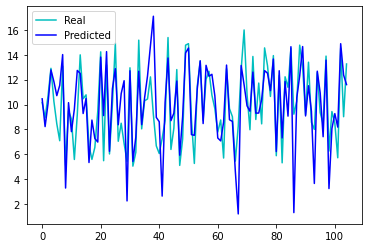

In [92]:
cmls.plot_real_vs_predict(y_test, preds)

### RF

In [93]:
from sklearn.model_selection import cross_val_score

In [94]:
def tune_rf(params):
    from sklearn.model_selection import cross_val_score
    bootstrap = params[0]
    max_depth = params[1]
    min_samples_leaf = params[2]
    min_samples_split = params[3]
    n_estimators = params[4]
    
    print(params, '\n')
    
    rf_model = RandomForestRegressor(bootstrap=bootstrap, max_depth=max_depth, min_samples_leaf=min_samples_leaf,
                                     min_samples_split=min_samples_split,n_estimators=n_estimators, random_state=0, criterion='poisson', n_jobs=-1)
    

    r2 = cross_val_score(rf_model, x_train, y_train, cv=5, scoring ='r2')
    
    return -r2.mean()

space = [
    [True, False], #bootstrap
    [10, 20, 30, None], #max_depth
    [1, 2, 4], # min_samples_leaf
    [2, 5, 10], # min_samples_split
    [5, 10, 20, 50, 100, 200, 300]] # n_estimators

In [95]:
%%time
from skopt import gp_minimize
rf_best_params = gp_minimize(tune_rf, space, random_state=0, verbose=True, n_calls=100, n_random_starts=20, n_jobs=-1)

Iteration No: 1 started. Evaluating function at random point.
[True, None, 4, 10, 100] 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 5.8124
Function value obtained: -0.5951
Current minimum: -0.5951
Iteration No: 2 started. Evaluating function at random point.
[False, 20, 1, 5, 50] 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 7.5489
Function value obtained: -0.2585
Current minimum: -0.5951
Iteration No: 3 started. Evaluating function at random point.
[True, 20, 2, 10, 20] 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 1.9215
Function value obtained: -0.5700
Current minimum: -0.5951
Iteration No: 4 started. Evaluating function at random point.
[True, 20, 4, 2, 200] 

Iteration No: 4 ended. Evaluation done at random point.
Time taken: 11.3392
Function value obtained: -0.5965
Current minimum: -0.5965
Iteration No: 5 started. Evaluating function at random point.
[False, 30, 2, 5, 100] 

Iteration No: 5 ended. Evaluation

/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 35 ended. Search finished for the next optimal point.
Time taken: 15.6403
Function value obtained: -0.6041
Current minimum: -0.6075
Iteration No: 36 started. Searching for the next optimal point.
[True, None, 1, 5, 20] 

Iteration No: 36 ended. Search finished for the next optimal point.
Time taken: 2.7066
Function value obtained: -0.5705
Current minimum: -0.6075
Iteration No: 37 started. Searching for the next optimal point.
[True, None, 1, 2, 100] 

Iteration No: 37 ended. Search finished for the next optimal point.
Time taken: 9.5226
Function value obtained: -0.6066
Current minimum: -0.6075
Iteration No: 38 started. Searching for the next optimal point.
[True, 10, 1, 10, 300] 

Iteration No: 38 ended. Search finished for the next optimal point.
Time taken: 19.8056
Function value obtained: -0.6004
Current minimum: -0.6075
Iteration No: 39 started. Searching for the next optimal point.
[True, None, 4, 2, 100] 

Iteration No: 39 ended. Search finished for the next optimal

/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 46 ended. Search finished for the next optimal point.
Time taken: 18.4174
Function value obtained: -0.6046
Current minimum: -0.6075
Iteration No: 47 started. Searching for the next optimal point.
[True, None, 4, 10, 200] 

Iteration No: 47 ended. Search finished for the next optimal point.
Time taken: 12.3108
Function value obtained: -0.5960
Current minimum: -0.6075
Iteration No: 48 started. Searching for the next optimal point.
[True, 20, 2, 2, 100] 

Iteration No: 48 ended. Search finished for the next optimal point.
Time taken: 8.3708
Function value obtained: -0.5979
Current minimum: -0.6075
Iteration No: 49 started. Searching for the next optimal point.
[True, 30, 1, 2, 100] 

Iteration No: 49 ended. Search finished for the next optimal point.
Time taken: 10.0917
Function value obtained: -0.6066
Current minimum: -0.6075
Iteration No: 50 started. Searching for the next optimal point.
[True, 30, 2, 2, 200] 

Iteration No: 50 ended. Search finished for the next optimal p

/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 51 ended. Search finished for the next optimal point.
Time taken: 15.7174
Function value obtained: -0.6075
Current minimum: -0.6075
Iteration No: 52 started. Searching for the next optimal point.
[True, 30, 2, 10, 50] 

Iteration No: 52 ended. Search finished for the next optimal point.
Time taken: 4.3144
Function value obtained: -0.5917
Current minimum: -0.6075
Iteration No: 53 started. Searching for the next optimal point.
[True, None, 2, 2, 5] 

Iteration No: 53 ended. Search finished for the next optimal point.
Time taken: 1.7714
Function value obtained: -0.5192
Current minimum: -0.6075
Iteration No: 54 started. Searching for the next optimal point.
[True, 20, 1, 2, 100] 

Iteration No: 54 ended. Search finished for the next optimal point.
Time taken: 9.7419
Function value obtained: -0.6066
Current minimum: -0.6075
Iteration No: 55 started. Searching for the next optimal point.
[True, 10, 1, 5, 10] 

Iteration No: 55 ended. Search finished for the next optimal point.


/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 56 ended. Search finished for the next optimal point.
Time taken: 15.6547
Function value obtained: -0.6075
Current minimum: -0.6075
Iteration No: 57 started. Searching for the next optimal point.
[True, 10, 1, 10, 10] 

Iteration No: 57 ended. Search finished for the next optimal point.
Time taken: 2.1733
Function value obtained: -0.5537
Current minimum: -0.6075
Iteration No: 58 started. Searching for the next optimal point.
[True, 10, 1, 10, 5] 

Iteration No: 58 ended. Search finished for the next optimal point.
Time taken: 1.7425
Function value obtained: -0.5444
Current minimum: -0.6075
Iteration No: 59 started. Searching for the next optimal point.
[True, 10, 1, 5, 200] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 59 ended. Search finished for the next optimal point.
Time taken: 16.1067
Function value obtained: -0.6075
Current minimum: -0.6075
Iteration No: 60 started. Searching for the next optimal point.
[True, 10, 1, 5, 200] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 60 ended. Search finished for the next optimal point.
Time taken: 15.4091
Function value obtained: -0.6075
Current minimum: -0.6075
Iteration No: 61 started. Searching for the next optimal point.
[True, 20, 1, 10, 50] 

Iteration No: 61 ended. Search finished for the next optimal point.
Time taken: 4.4569
Function value obtained: -0.5919
Current minimum: -0.6075
Iteration No: 62 started. Searching for the next optimal point.
[True, 30, 1, 2, 20] 

Iteration No: 62 ended. Search finished for the next optimal point.
Time taken: 3.0602
Function value obtained: -0.5736
Current minimum: -0.6075
Iteration No: 63 started. Searching for the next optimal point.
[True, None, 2, 10, 300] 

Iteration No: 63 ended. Search finished for the next optimal point.
Time taken: 18.9632
Function value obtained: -0.5976
Current minimum: -0.6075
Iteration No: 64 started. Searching for the next optimal point.
[True, 10, 1, 2, 100] 

Iteration No: 64 ended. Search finished for the next optimal poi

/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 68 ended. Search finished for the next optimal point.
Time taken: 9.8362
Function value obtained: -0.6080
Current minimum: -0.6080
Iteration No: 69 started. Searching for the next optimal point.
[True, 10, 2, 10, 100] 

Iteration No: 69 ended. Search finished for the next optimal point.
Time taken: 7.9884
Function value obtained: -0.5971
Current minimum: -0.6080
Iteration No: 70 started. Searching for the next optimal point.
[True, 20, 4, 5, 50] 

Iteration No: 70 ended. Search finished for the next optimal point.
Time taken: 4.2600
Function value obtained: -0.5949
Current minimum: -0.6080
Iteration No: 71 started. Searching for the next optimal point.
[True, 10, 1, 2, 100] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 71 ended. Search finished for the next optimal point.
Time taken: 10.1580
Function value obtained: -0.6080
Current minimum: -0.6080
Iteration No: 72 started. Searching for the next optimal point.
[True, 10, 1, 2, 100] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 72 ended. Search finished for the next optimal point.
Time taken: 10.2389
Function value obtained: -0.6080
Current minimum: -0.6080
Iteration No: 73 started. Searching for the next optimal point.
[True, 10, 1, 2, 100] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 73 ended. Search finished for the next optimal point.
Time taken: 10.1635
Function value obtained: -0.6080
Current minimum: -0.6080
Iteration No: 74 started. Searching for the next optimal point.
[True, 20, 1, 5, 300] 

Iteration No: 74 ended. Search finished for the next optimal point.
Time taken: 25.2395
Function value obtained: -0.6024
Current minimum: -0.6080
Iteration No: 75 started. Searching for the next optimal point.
[True, 10, 1, 2, 100] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 75 ended. Search finished for the next optimal point.
Time taken: 10.1568
Function value obtained: -0.6080
Current minimum: -0.6080
Iteration No: 76 started. Searching for the next optimal point.
[True, 10, 4, 5, 10] 

Iteration No: 76 ended. Search finished for the next optimal point.
Time taken: 2.2155
Function value obtained: -0.5748
Current minimum: -0.6080
Iteration No: 77 started. Searching for the next optimal point.
[True, 30, 2, 5, 10] 

Iteration No: 77 ended. Search finished for the next optimal point.
Time taken: 2.2816
Function value obtained: -0.5488
Current minimum: -0.6080
Iteration No: 78 started. Searching for the next optimal point.
[True, 10, 1, 2, 100] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 78 ended. Search finished for the next optimal point.
Time taken: 10.2729
Function value obtained: -0.6080
Current minimum: -0.6080
Iteration No: 79 started. Searching for the next optimal point.
[True, 10, 4, 5, 5] 

Iteration No: 79 ended. Search finished for the next optimal point.
Time taken: 1.9578
Function value obtained: -0.5770
Current minimum: -0.6080
Iteration No: 80 started. Searching for the next optimal point.
[True, 10, 1, 2, 100] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 80 ended. Search finished for the next optimal point.
Time taken: 10.1759
Function value obtained: -0.6080
Current minimum: -0.6080
Iteration No: 81 started. Searching for the next optimal point.
[True, 20, 4, 2, 300] 

Iteration No: 81 ended. Search finished for the next optimal point.
Time taken: 18.5765
Function value obtained: -0.5955
Current minimum: -0.6080
Iteration No: 82 started. Searching for the next optimal point.
[True, 30, 4, 5, 20] 

Iteration No: 82 ended. Search finished for the next optimal point.
Time taken: 2.9406
Function value obtained: -0.5830
Current minimum: -0.6080
Iteration No: 83 started. Searching for the next optimal point.
[True, 10, 1, 2, 100] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 83 ended. Search finished for the next optimal point.
Time taken: 10.6682
Function value obtained: -0.6080
Current minimum: -0.6080
Iteration No: 84 started. Searching for the next optimal point.
[True, 10, 1, 2, 100] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 84 ended. Search finished for the next optimal point.
Time taken: 10.4065
Function value obtained: -0.6080
Current minimum: -0.6080
Iteration No: 85 started. Searching for the next optimal point.
[True, 10, 1, 2, 100] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 85 ended. Search finished for the next optimal point.
Time taken: 10.2326
Function value obtained: -0.6080
Current minimum: -0.6080
Iteration No: 86 started. Searching for the next optimal point.
[True, 10, 1, 2, 100] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 86 ended. Search finished for the next optimal point.
Time taken: 10.5938
Function value obtained: -0.6080
Current minimum: -0.6080
Iteration No: 87 started. Searching for the next optimal point.
[True, 10, 1, 2, 100] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 87 ended. Search finished for the next optimal point.
Time taken: 10.9797
Function value obtained: -0.6080
Current minimum: -0.6080
Iteration No: 88 started. Searching for the next optimal point.
[True, 10, 1, 2, 100] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 88 ended. Search finished for the next optimal point.
Time taken: 10.5788
Function value obtained: -0.6080
Current minimum: -0.6080
Iteration No: 89 started. Searching for the next optimal point.
[True, None, 1, 2, 50] 

Iteration No: 89 ended. Search finished for the next optimal point.
Time taken: 6.6172
Function value obtained: -0.6008
Current minimum: -0.6080
Iteration No: 90 started. Searching for the next optimal point.
[True, 10, 1, 2, 100] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 90 ended. Search finished for the next optimal point.
Time taken: 10.1752
Function value obtained: -0.6080
Current minimum: -0.6080
Iteration No: 91 started. Searching for the next optimal point.
[False, 10, 2, 2, 200] 

Iteration No: 91 ended. Search finished for the next optimal point.
Time taken: 27.1259
Function value obtained: -0.2592
Current minimum: -0.6080
Iteration No: 92 started. Searching for the next optimal point.
[False, 20, 1, 10, 5] 

Iteration No: 92 ended. Search finished for the next optimal point.
Time taken: 2.6078
Function value obtained: -0.2564
Current minimum: -0.6080
Iteration No: 93 started. Searching for the next optimal point.
[True, 10, 2, 5, 20] 

Iteration No: 93 ended. Search finished for the next optimal point.
Time taken: 3.2487
Function value obtained: -0.5735
Current minimum: -0.6080
Iteration No: 94 started. Searching for the next optimal point.
[True, 10, 1, 2, 100] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 94 ended. Search finished for the next optimal point.
Time taken: 10.2294
Function value obtained: -0.6080
Current minimum: -0.6080
Iteration No: 95 started. Searching for the next optimal point.
[True, 10, 1, 2, 100] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 95 ended. Search finished for the next optimal point.
Time taken: 10.0897
Function value obtained: -0.6080
Current minimum: -0.6080
Iteration No: 96 started. Searching for the next optimal point.
[True, 10, 1, 2, 100] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 96 ended. Search finished for the next optimal point.
Time taken: 9.7897
Function value obtained: -0.6080
Current minimum: -0.6080
Iteration No: 97 started. Searching for the next optimal point.
[True, 10, 1, 2, 100] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 97 ended. Search finished for the next optimal point.
Time taken: 9.9851
Function value obtained: -0.6080
Current minimum: -0.6080
Iteration No: 98 started. Searching for the next optimal point.
[True, 10, 1, 2, 100] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 98 ended. Search finished for the next optimal point.
Time taken: 9.9156
Function value obtained: -0.6080
Current minimum: -0.6080
Iteration No: 99 started. Searching for the next optimal point.
[True, 10, 1, 2, 100] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 99 ended. Search finished for the next optimal point.
Time taken: 9.9995
Function value obtained: -0.6080
Current minimum: -0.6080
Iteration No: 100 started. Searching for the next optimal point.
[True, 10, 1, 2, 100] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 100 ended. Search finished for the next optimal point.
Time taken: 9.9661
Function value obtained: -0.6080
Current minimum: -0.6080
CPU times: user 2min 39s, sys: 3min 16s, total: 5min 55s
Wall time: 17min 20s


In [96]:
rf_best_params.x

[True, 10, 1, 2, 100]

In [101]:
rf_model = RandomForestRegressor(bootstrap=True, max_depth=10,
                                     min_samples_leaf=1, min_samples_split=2,
                                     n_estimators=100, random_state=0, n_jobs=-1)

rf_model.fit(x_train, y_train)
preds = rf_model.predict(x_test)
cmls.evalute_model(y_test, preds)

,R2,MAE,RMSE,RPD
Teste,0.694495,1.231593,1.667493,1.817895


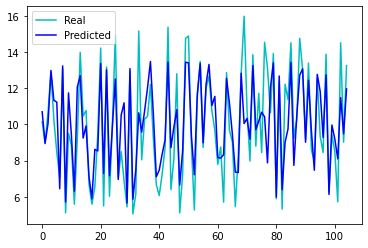

In [102]:
cmls.plot_real_vs_predict(y_test, preds)